In [1]:
# Importación de librerias
import pandas as pd
import regex as re

C:\Users\PC\AppData\Local\Temp\ipykernel_18988\3333142294.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_excel(r"H:\Mi unidad\a20151428@pucp.edu.pe 2023-10-29 03 16\2. Académic\19. Winter camp\sdc_outcomes_clasificado.xlsx")
df

,Número de Resolución,Fecha de Resolución,Expediente,Partes,Sumilla,Resolución Impugnada,Cláusula General,Engaño,Confusión,Reputación Ajena,Denigración,Equiparación Indebida,Secretos Empresariales,Violación de Normas,Sabotaje Empresarial,Autenticidad,Legalidad,Adecuación Social,Procedimental,Enlace
0,1-2019-SDC,08/01/2019,269-2017/CCD,CERRADURAS NACIONALES S.A.C GRUPO FORTE S.A.C.,Se declara la NULIDAD de la Resolución 5 del 1...,Comisión de Fiscalización de la Competencia De...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No confirma,http://servicio.indecopi.gob.pe/buscadorResolu...
1,10-2009-SC1,13/01/2009,4-2005/CCD,CAJA MUNICIPAL DE AHORRO Y CRÉDITO CUSCO S.A. ...,Se confirma la Resolución 098-2008/CCD del 9 d...,098-2008/CCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
2,10-2016-SDC,11/01/2016,1-2014/CCD-INDECOPI-SAM,PROCEDIMIENTO INICIADO DE OFICIO EMPRESA DE SE...,Se CONFIRMA la Resolución 093-2015/CCD-INDECOP...,093-2015/CCD-INDECOPI-SAM,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
3,10-2017-SDC,09/01/2017,16-2015/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO ESTILOS COLLE...,Se CONFIRMA la Resolución 0191-2016/INDECOPI-C...,0191-2016/CCD-INDECOPI-CAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
4,10-2018-SDC,15/01/2018,41-2017/CCD,PRODUCCIÓN Y MANTENIMIENTO DEL PERÚ S.A.C. INV...,Se CONFIRMA la Resolución s/n del 19 de abril ...,Secretaría Técnica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,99-2015-SC1,17/02/2015,172-2013/CCD,PROCEDIMIENTO INICIADO DE OFICIO E. WONG S.A.,SE CONFIRMA LA RESOLUCIÓN 136-2014/CCD-INDECOP...,136-2014/CCD-INDECOPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1266,99-2018-SDC,10/05/2018,5-2016/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO WYF S.A.C.,Se CONFIRMA el extremo de la Resolución 0230-2...,0230-2017/INDECOP I-CAJ,NaN,Confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1267,99-2019-SDC,14/05/2019,16-2018/CCD,ATRÁPALO PERÚ S.A.C. TELEDISTRIBUCIÓN S.A.,Se CONFIRMA la Resolución 0176-2018/CCD-INDECO...,0176-2018/CCD-INDECOPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confirma,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...
1268,99-2020-SDC,27/08/2020,204-2018/CCD,ASOCIACIÓN INTERNACIONAL DE CONSUMIDORES Y USU...,Se REVOCA la Resolución la Resolución 176-2019...,176-2019/CCD-INDECOPI,NaN,No confirma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...


In [ ]:
import matplotlib.pyplot as plt

In [3]:
categorical_values=['Cláusula General','Engaño', 'Confusión', 'Reputación Ajena', 'Denigración', 
                    'Equiparación Indebida','Violación de Normas','Secretos Empresariales','Sabotaje Empresarial', 
                    'Autenticidad', 'Legalidad', 'Adecuación Social', 'Procedimental']

In [4]:
# Initialize the new columns
df['Confirma'] = 0
df['Confirmación parcial'] = 0
df['No confirma'] = 0

# Iterate over each row and count the occurrences of each keyword
for index, row in df.iterrows():
    df.at[index, 'Confirma'] = sum(row[col] == 'Confirma' for col in categorical_values if col in df.columns)
    df.at[index, 'Confirmación parcial'] = sum(row[col] == 'Confirmación parcial' for col in categorical_values if col in df.columns)
    df.at[index, 'No confirma'] = sum(row[col] == 'No confirma' for col in categorical_values if col in df.columns)

df


,Número de Resolución,Fecha de Resolución,Expediente,Partes,Sumilla,Resolución Impugnada,Cláusula General,Engaño,Confusión,Reputación Ajena,...,Violación de Normas,Sabotaje Empresarial,Autenticidad,Legalidad,Adecuación Social,Procedimental,Enlace,Confirma,Confirmación parcial,No confirma
0,1-2019-SDC,08/01/2019,269-2017/CCD,CERRADURAS NACIONALES S.A.C GRUPO FORTE S.A.C.,Se declara la NULIDAD de la Resolución 5 del 1...,Comisión de Fiscalización de la Competencia De...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,No confirma,http://servicio.indecopi.gob.pe/buscadorResolu...,0,0,1
1,10-2009-SC1,13/01/2009,4-2005/CCD,CAJA MUNICIPAL DE AHORRO Y CRÉDITO CUSCO S.A. ...,Se confirma la Resolución 098-2008/CCD del 9 d...,098-2008/CCD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirma,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
2,10-2016-SDC,11/01/2016,1-2014/CCD-INDECOPI-SAM,PROCEDIMIENTO INICIADO DE OFICIO EMPRESA DE SE...,Se CONFIRMA la Resolución 093-2015/CCD-INDECOP...,093-2015/CCD-INDECOPI-SAM,NaN,Confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
3,10-2017-SDC,09/01/2017,16-2015/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO ESTILOS COLLE...,Se CONFIRMA la Resolución 0191-2016/INDECOPI-C...,0191-2016/CCD-INDECOPI-CAJ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,1,0
4,10-2018-SDC,15/01/2018,41-2017/CCD,PRODUCCIÓN Y MANTENIMIENTO DEL PERÚ S.A.C. INV...,Se CONFIRMA la Resolución s/n del 19 de abril ...,Secretaría Técnica,NaN,NaN,NaN,NaN,...,Confirma,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,99-2015-SC1,17/02/2015,172-2013/CCD,PROCEDIMIENTO INICIADO DE OFICIO E. WONG S.A.,SE CONFIRMA LA RESOLUCIÓN 136-2014/CCD-INDECOP...,136-2014/CCD-INDECOPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Confirmación parcial,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,1,0
1266,99-2018-SDC,10/05/2018,5-2016/CCD-INDECOPI-CAJ,PROCEDIMIENTO INICIADO DE OFICIO WYF S.A.C.,Se CONFIRMA el extremo de la Resolución 0230-2...,0230-2017/INDECOP I-CAJ,NaN,Confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
1267,99-2019-SDC,14/05/2019,16-2018/CCD,ATRÁPALO PERÚ S.A.C. TELEDISTRIBUCIÓN S.A.,Se CONFIRMA la Resolución 0176-2018/CCD-INDECO...,0176-2018/CCD-INDECOPI,NaN,NaN,NaN,NaN,...,NaN,Confirma,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,1,0,0
1268,99-2020-SDC,27/08/2020,204-2018/CCD,ASOCIACIÓN INTERNACIONAL DE CONSUMIDORES Y USU...,Se REVOCA la Resolución la Resolución 176-2019...,176-2019/CCD-INDECOPI,NaN,No confirma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://servicio.indecopi.gob.pe/buscadorResolu...,0,0,1


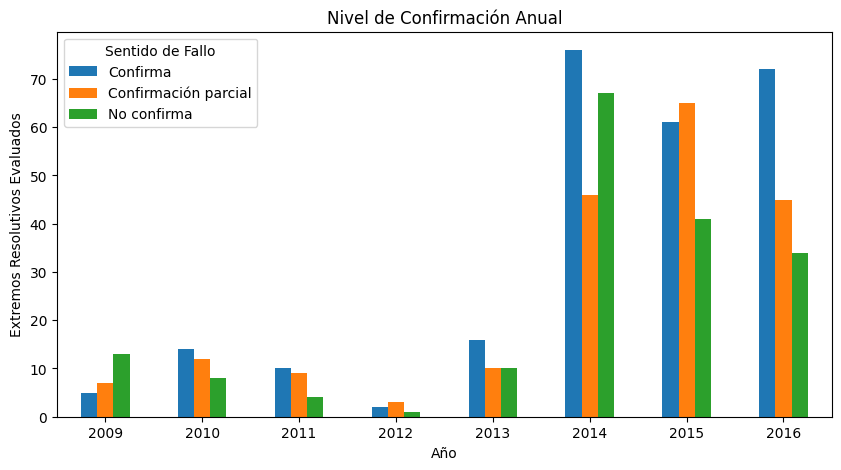

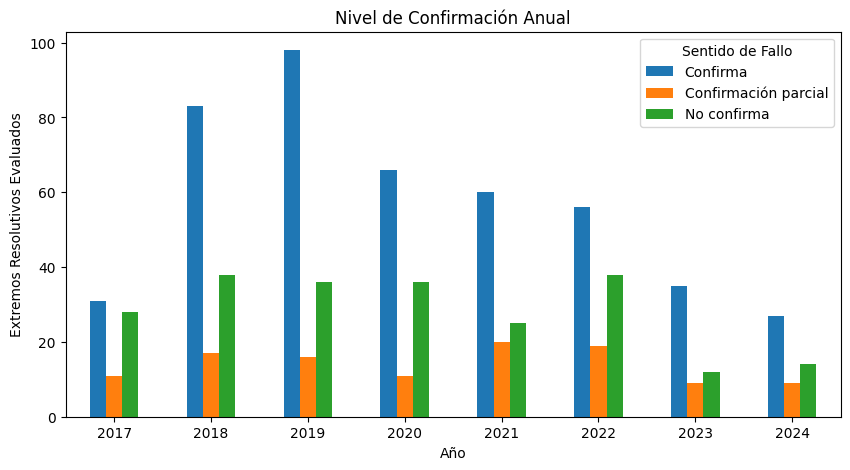

In [8]:
import matplotlib.pyplot as plt
df['Fecha de Resolución'] = pd.to_datetime(df['Fecha de Resolución'], format='%d/%m/%Y')
df['Year'] = df['Fecha de Resolución'].dt.year

grouped_df = df.groupby('Year')[['Confirma', 'Confirmación parcial', 'No confirma']].sum()

group_2009_2016 = grouped_df.loc[2009:2016]
group_2017_2024 = grouped_df.loc[2017:2024]


# Plotting the histogram
plt.figure(figsize=(10, 5))
group_2009_2016.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Nivel de Confirmación Anual')
plt.xlabel('Año')
plt.ylabel('Extremos Resolutivos Evaluados')
plt.xticks(rotation=0)
plt.legend(title='Sentido de Fallo')
plt.show()


plt.figure(figsize=(10, 5))
group_2017_2024.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Nivel de Confirmación Anual')
plt.xlabel('Año')
plt.ylabel('Extremos Resolutivos Evaluados')
plt.xticks(rotation=0)
plt.legend(title='Sentido de Fallo')
plt.show()

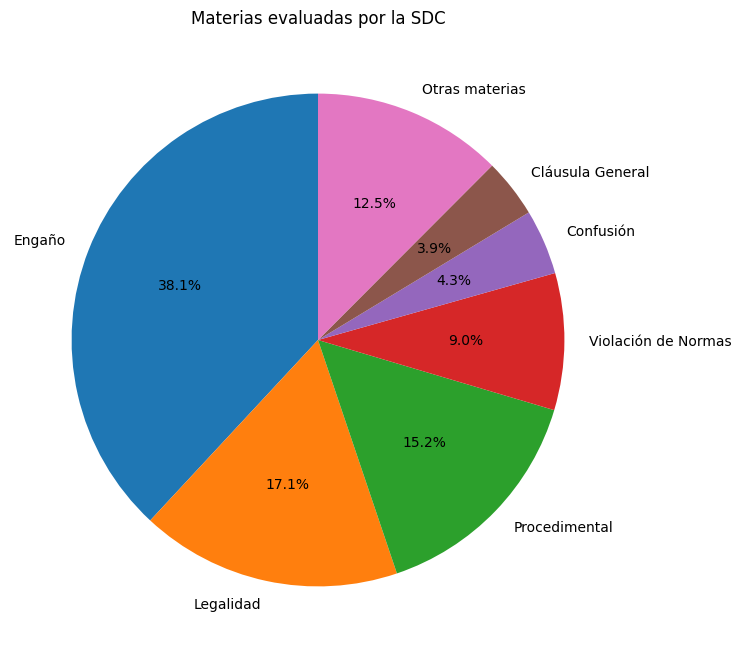

In [9]:
import matplotlib.pyplot as plt
observations = df[categorical_values].count()

# Calculate percentage and sort by descending order
percentage = (observations / observations.sum()).sort_values(ascending=False)

# Select the top 6 categories
top_6 = percentage.head(6)

# Sum the remaining categories and label as "Others"
others = pd.Series(percentage.iloc[6:].sum(), index=['Otras materias'])

# Combine the top 6 with "Others"
final_data = pd.concat([top_6, others])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_data, labels=final_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Materias evaluadas por la SDC')
plt.show()

In [7]:
import pandas as pd

df= pd.read_excel(r"D:\Proyectos\el_peruano\el_peruano_dls_resumen.xlsx")    

In [8]:
df

,Autor,Norma,Fecha,Sumilla,Resumen,Tema,Enlace
0,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1687,2024-10-02,Decreto Legislativo que modifica el Decreto Le...,**Objeto del Decreto Legislativo:** \n - Modi...,Misceláneos,https://epdoc2.elperuano.pe/EpPo/DescargaIN.as...
1,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1688,2024-10-02,Decreto Legislativo que regula obligaciones y ...,Obligaciones de Empresas de Telecomunicaciones...,Telecomunicaciones,https://epdoc2.elperuano.pe/EpPo/DescargaIN.as...
2,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1689,2024-10-02,Decreto Legislativo que declara de necesidad p...,- **Derogación de Normas Previas**: Se elimina...,Infraestructura y Concesiones,https://epdoc2.elperuano.pe/EpPo/DescargaIN.as...
3,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1690,2024-10-02,Decreto Legislativo que fomenta la simplificac...,- **Objeto y finalidad del Decreto Legislativo...,Derecho Público,https://epdoc2.elperuano.pe/EpPo/DescargaIN.as...
4,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1691,2024-10-02,Decreto Legislativo que modifica el Decreto Le...,- **Ámbito de Aplicación**: El Decreto Legisla...,Infraestructura y Concesiones,https://epdoc2.elperuano.pe/EpPo/DescargaIN.as...
...,...,...,...,...,...,...,...
63,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1623,2024-08-04,Decreto Legislativo que modifica la Ley del Im...,- **Objetivo del Decreto Legislativo:**\n - R...,Tributario,https://busquedas.elperuano.pe/api/visor_html/...
64,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1624,2024-08-04,Decreto Legislativo que modifica la Ley del Im...,- **Objeto del Decreto Legislativo**: Modifica...,Tributario,https://busquedas.elperuano.pe/api/visor_html/...
65,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1622,2024-07-27,Decreto Legislativo que modifica los artículos...,- **Objetivo del Decreto Legislativo**: Modifi...,Contratación Pública,https://busquedas.elperuano.pe/api/visor_html/...
66,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1621,2024-07-08,Decreto Legislativo que regula un retorno grad...,- **Objetivo del Decreto Legislativo Nº 1621**...,Misceláneos,https://busquedas.elperuano.pe/api/visor_html/...


In [11]:
df = df[~df['Tema'].str.contains('Misceláneos', na=False)]


In [13]:
df = df.sort_values(by='Tema')

# Reset the index if you want a clean index after sorting
df.reset_index(drop=True, inplace=True)

In [18]:
df

,Autor,Norma,Fecha,Sumilla,Resumen,Tema,Enlace
0,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1622,2024-07-27,Decreto Legislativo que modifica los artículos...,- **Objetivo del Decreto Legislativo**: Modifi...,Contratación Pública,https://busquedas.elperuano.pe/api/visor_html/...
1,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1647,2024-09-13,Decreto Legislativo que establece la obligator...,- **Objetivo del Decreto Legislativo**: \n - ...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
2,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1650,2024-09-13,Decreto Legislativo que modifica el artículo 8...,- **Delegación de Facultades**: El Congreso de...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
3,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1651,2024-09-13,Decreto Legislativo que modifica el artículo 4...,- **Objetivo del Decreto Legislativo**:\n - M...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
4,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1675,2024-09-28,Decreto Legislativo que modifica la Ley N° 290...,- **Propósito del Decreto Legislativo**: Modif...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
5,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1674,2024-09-28,Decreto Legislativo que modifica la Ley N° 313...,- **Objetivo del Decreto**: Modificar la Ley d...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
6,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1653,2024-09-13,Decreto Legislativo que modifica el Decreto Le...,- **Facultad de Legislar:** El Congreso delegó...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
7,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1678,2024-09-28,Decreto Legislativo que garantiza la continuid...,- **Objetivo del Decreto Legislativo:** \n - ...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
8,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1677,2024-09-28,Decreto Legislativo para el fortalecimiento y ...,- **Objeto del Decreto Legislativo:** \n - Fo...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...
9,DECRETOS LEGISLATIVOS,DECRETO LEGISLATIVO N° 1672,2024-09-28,Decreto Legislativo que modifica la Ley N° 300...,- **Objetivo del Decreto Legislativo**: Modifi...,Derecho Público,https://busquedas.elperuano.pe/api/visor_html/...


In [19]:
df['Resumen'] = df['Resumen'].str.replace('\\*', '', regex=True)


In [21]:
from pptx import Presentation
from pptx.util import Inches
presentation = Presentation()

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Add a new slide
    slide = presentation.slides.add_slide(presentation.slide_layouts[5])  # Layout 5 is a blank slide
    
    # Set the title and content
    title = slide.shapes.title
    content = slide.shapes.add_textbox(Inches(1), Inches(1), Inches(8), Inches(5))  # Position and size of the textbox
    text_frame = content.text_frame
    
    # Add text in the desired order
    text_frame.add_paragraph().text = f"Norma: {row['Norma']}"
    text_frame.add_paragraph().text = f"Tema: {row['Tema']}"
    text_frame.add_paragraph().text = f"Resumen: {row['Resumen']}"
    text_frame.add_paragraph().text = f"Enlace: {row['Enlace']}"
    
# Save the presentation
presentation.save(r'D:\Proyectos\el_peruano\output_presentation.pptx')

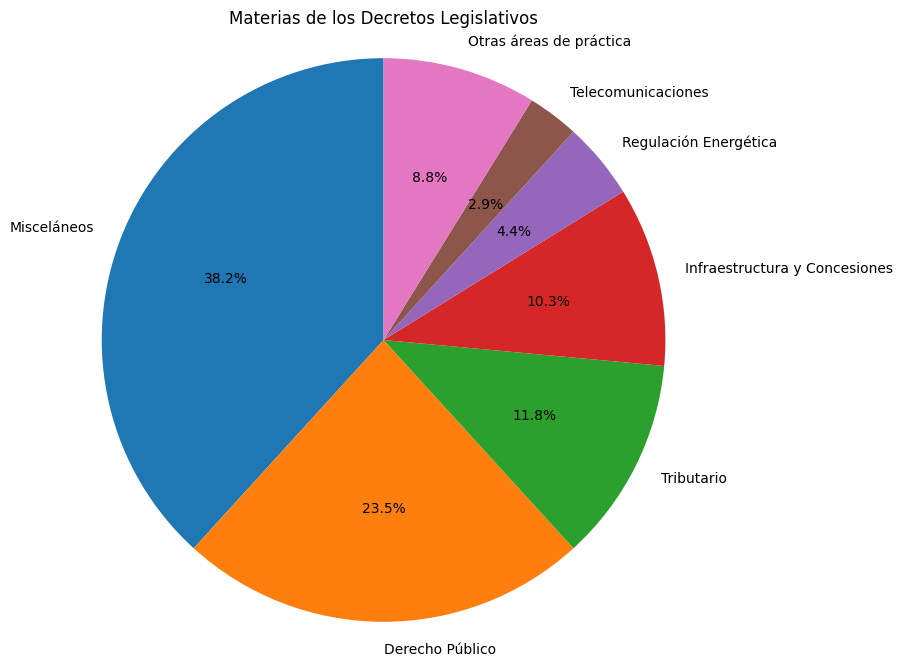

In [10]:
tema_counts = df['Tema'].value_counts()

# Get the top 6 themes and combine the rest into 'Otras áreas de práctica'
top_temas = tema_counts.head(6)
other_count = tema_counts[6:].sum()

# Create a new Series for 'Otras áreas de práctica'
other_series = pd.Series({'Otras áreas de práctica': other_count})

# Use pd.concat to combine the top themes and the 'Otras áreas de práctica'
tema_counts_modified = pd.concat([top_temas, other_series])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tema_counts_modified, labels=tema_counts_modified.index, autopct='%1.1f%%', startangle=90)
plt.title('Materias de los Decretos Legislativos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

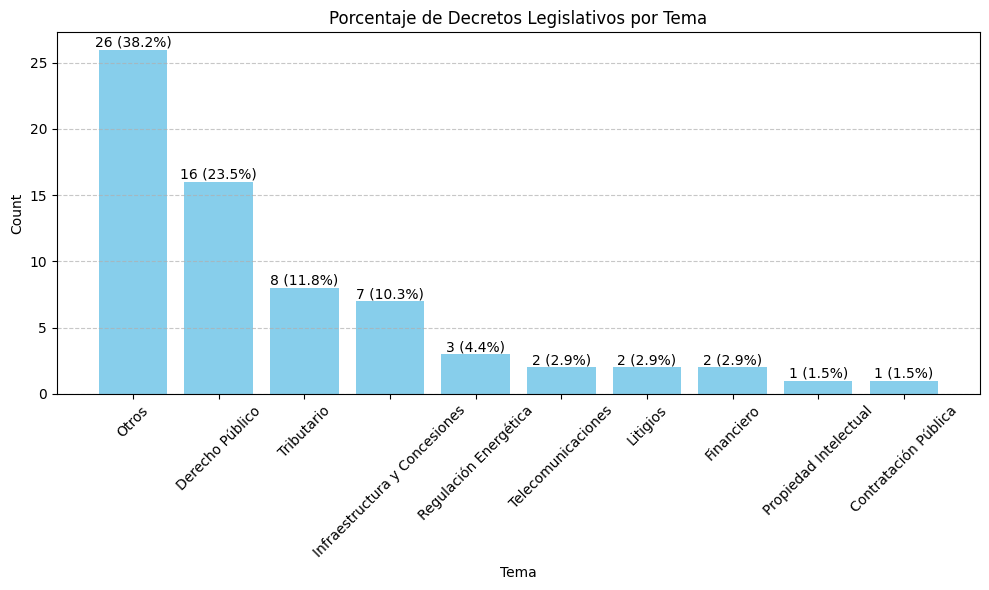

In [5]:
tema_counts = df['Tema'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tema_counts.index, tema_counts.values, color='skyblue')
plt.xlabel('Tema')
plt.ylabel('Count')
plt.title('Porcentaje de Decretos Legislativos por Tema')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the percentages on top of the bars
for index, value in enumerate(tema_counts.values):
    plt.text(index, value, f'{value} ({value / len(df) * 100:.1f}%)', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better display
plt.show()